<a href="https://colab.research.google.com/github/elakiavm/house-predication/blob/main/project_1_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

In [ ]:
print(house_price_dataset)

In [ ]:
# Loading the dataaset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

In [ ]:
# Print First 5 rows of our DataFrame 
house_price_dataframe.head()

In [ ]:
# add the target(price) column to the dataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# checking the number of rows and columns in the data 
house_price_dataframe.shape

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum()

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Understanding the cirrelation between various features in hte dateset
#1.postive correlation 
#2.negavtive correaltion

In [ ]:
correlation = house_price_dataframe.corr()

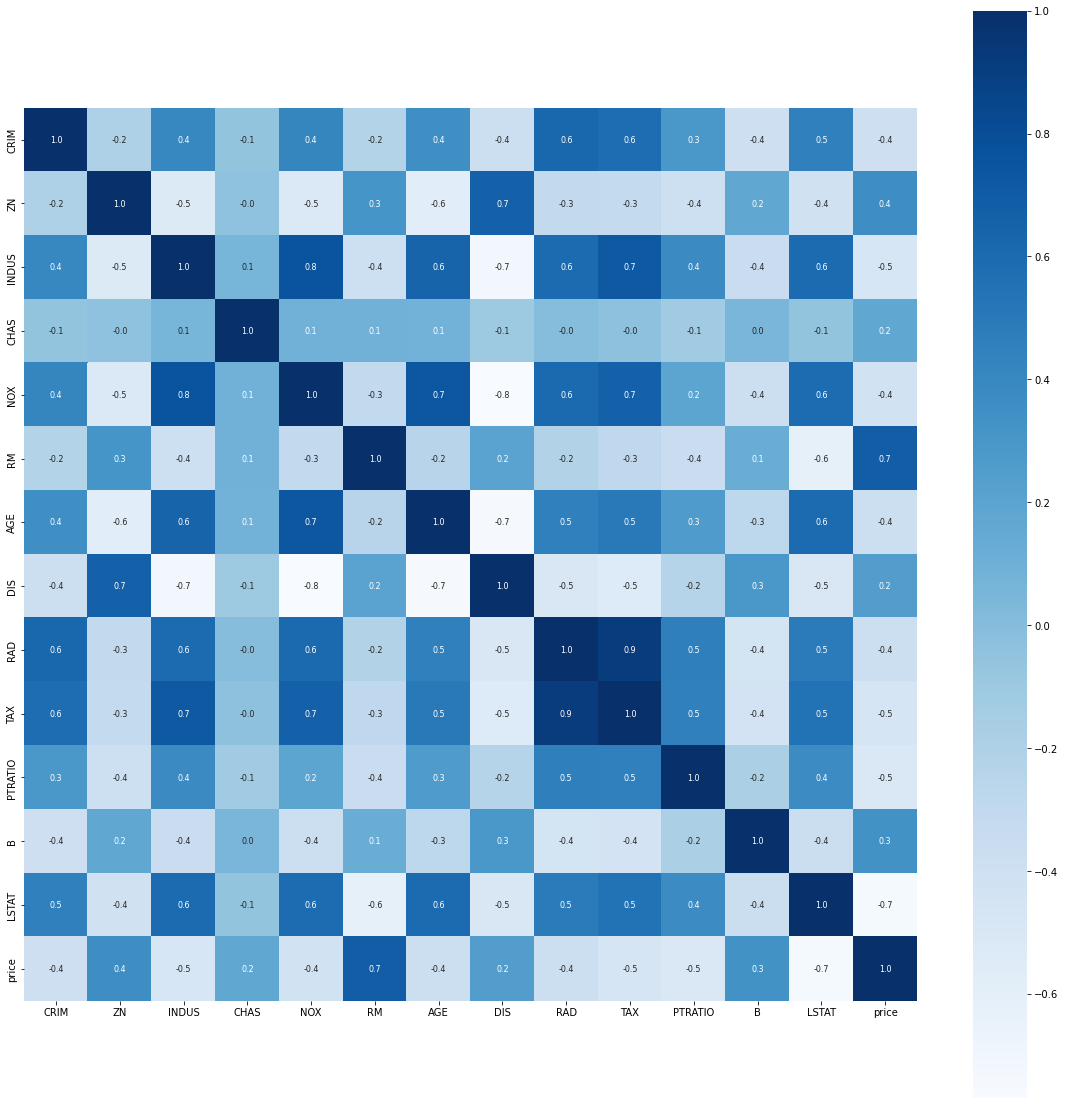

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
# Splitting the data and target 
x = house_price_dataframe.drop(['price'], axis=1)
y = house_price_dataframe['price']

In [ ]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [ ]:
# splitting the data into training data and test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2 )

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [ ]:
# Model Training 
# XGBooost Regressor
# loading the model 
model = XGBRegressor()

In [ ]:
# training the model with 
model.fit(x_train,y_train)

[07:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Evaluation
# Predication on training data
# accuracy for predication on training data 
training_data_predict = model.predict(x_train)

In [ ]:
print(training_data_predict)

In [ ]:
# R square error
score_1 = metrics.r2_score(y_train,training_data_predict)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_predict)

In [ ]:
print("R square error :",score_1)
print("mean absolute error :",score_2)


Text(0.5, 1.0, 'actual prices vs predict')

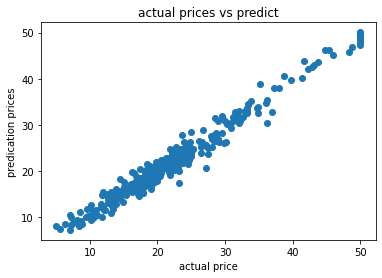

In [ ]:
# visulaizing the actual price and predcited price 
plt.scatter(y_train,training_data_predict)
plt.xlabel("actual price")
plt.ylabel("predication prices")
plt.title("actual prices vs predict")

In [ ]:
# prediction on test data
# accuracy for prediction on training data
test_data_predict = model.predict(x_test)

In [ ]:
# R square error
score_1 = metrics.r2_score(y_test,test_data_predict)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_predict)

In [ ]:
print("R square error :",score_1)
print("mean absolute error :",score_2)

R square error : 0.9115937697657654
mean absolute error : 1.9922956859364223
